In [ ]:
# pip install folium
# conda install gensim

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import folium
import seaborn as sns
from datetime import datetime
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jiawei/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiawei/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load Data

In [3]:
df = pd.read_csv('data/Hotel_Reviews.csv', encoding = 'utf-8')
print(df.shape)
df.head()

(515738, 17)


Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

# Data Cleaning

In [5]:
print(df.isnull().sum())
print(df.info())

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
Hotel_Add

# Data Exploration

In [20]:
def autolabel(rects):
    """Autolabel chart function.
    Arguments
        rects: Input tensor
    Returns
        Attach a text label above each bar in *rects*, displalying its height.
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def bar_chart(labels, freq, size, title, ylabel, angel):
    """Bar chart function.
    Arguments
        labels: x-axis label.
        freq: y-axis data.
        size: figure size.
        title: figure title.
        ylabel: name of y.
        angel: rotation angel of x label.
    Returns
        barchart
    """
    labels = labels.tolist()
    freq = freq.tolist()
    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars
    fig, ax = plt.subplots(figsize = size)
    rects = ax.bar(x, freq, width, label=ylabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = angel)
    ax.legend()
#     autolabel(rects)
    fig.tight_layout()
    plt.show()

In [30]:
def frequency(col):
    """Feature frequency count function.
    Arguments
        col: column name that want to be group by
    Returns
        new dataframe
    """
    df_freq = df.groupby(col)[col].agg({'count'}).reset_index().sort_values(by = 'count', ascending = False)
    return df_freq

## Hotel Frequency

In [31]:
hotel = frequency('Hotel_Name')
hotel.to_csv('data/hotel.csv', index = False)
print("The most popular hotel is: " + hotel[:1]['Hotel_Name'].values.tolist()[0] + '.')
print("The most unpopular hotel is: " + hotel[-1:]['Hotel_Name'].values.tolist()[0] + '.')

The most popular hotel is: Britannia International Hotel Canary Wharf.
The most unpopular hotel is: Hotel Gallitzinberg.


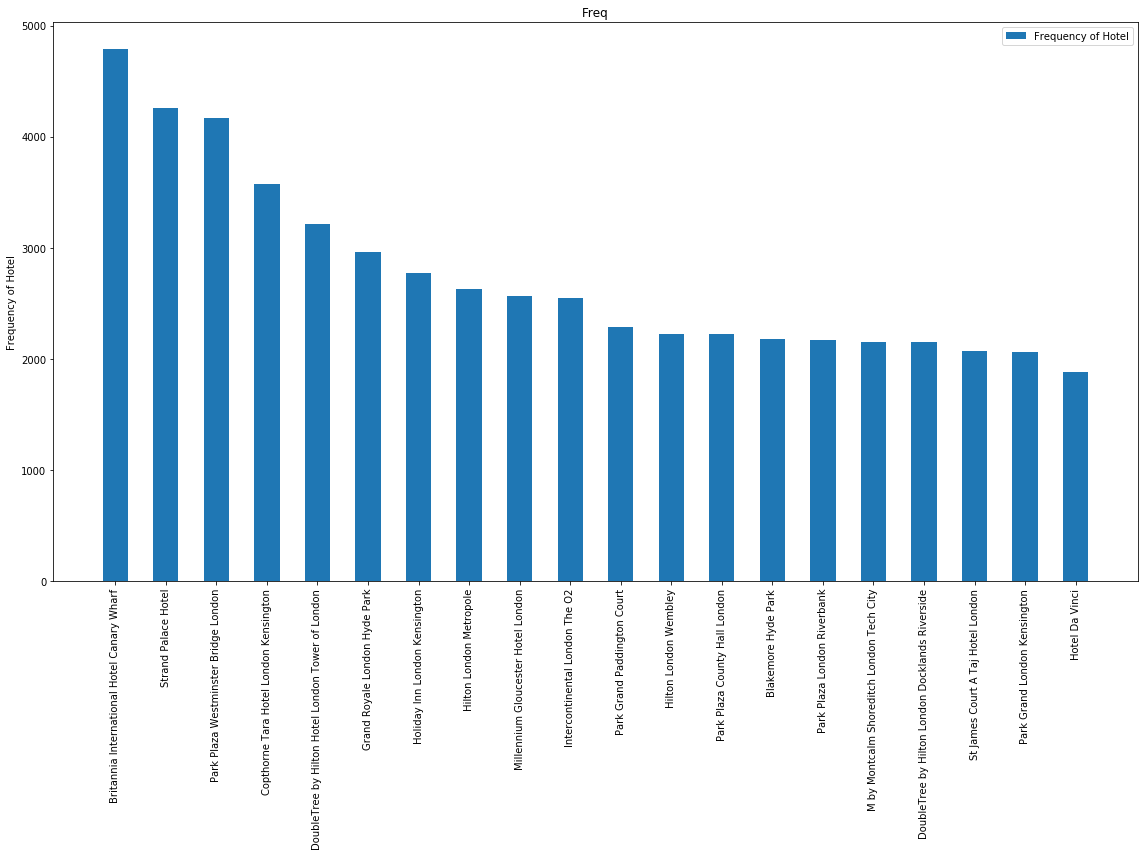

In [21]:
# only show top 20 hotels in this bar chart
hotel = hotel[:20]
bar_chart(hotel['Hotel_Name'], hotel['count'], (16,12), 'Freq', 'Frequency of Hotel', 90)

Based on the bar chart, the Britannia International Hotel Canary Wharf, Strand Palace Hotel, and Park Plaza Westminster Bridge London are the top 3 frequent hotels that travelers stay.

## Hotel Location

In [22]:
location = df[['Hotel_Name', 'lat', 'lng']]
# drop hotel without location
location.dropna(axis = 0, how = 'any', inplace = True)
location.drop_duplicates('Hotel_Name', 'first', inplace = True)
location.reset_index(drop = True, inplace = True)
location.to_csv('data/location.csv', index = False)
location.head()

/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Hotel_Name        lat       lng
0                       Hotel Arena  52.360576  4.915968
1                  K K Hotel George  51.491888 -0.194971
2           Apex Temple Court Hotel  51.513734 -0.108751
3  The Park Grand London Paddington  51.514218 -0.180903
4               Monhotel Lounge SPA  48.874348  2.289733

### Hotel Location in Europe

In [23]:
# set the center point on Switherland
latitude = 47.22
longitude = 8.32

from folium import plugins
# start a clean copy of the map of europe
hotel_map = folium.Map(location = [latitude, longitude], zoom_start = 5)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(hotel_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(location['lat'], location['lng'], location['Hotel_Name']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# add incidents to map
hotel_map.add_child(incidents)

In case of the map can not be shown correctly, I insert the image from local.

![title](EuropeHotels.png)

The hotel mainly scatters in France and the United Kingdom. Other hotels located in Spain, Italy, the Republic of Austria, and the Netherland. It shows that people always travel to these destinations.

### Hotel Location in the London

In [24]:
# Set the center point on London
latitude = 51.513981
longitude = -0.133795

# Create map and display it
hotel_map = folium.Map(location=[latitude, longitude], zoom_start=12)
incidents = folium.map.FeatureGroup()

# Loop through the all location points and add each to the incidents feature group
for lat, lng, in zip(location['lat'], location['lng']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow', # set the location point color
        )
    )

latitudes = location['lat'].tolist()
longitudes = location['lng'].tolist()
labels = location['Hotel_Name'].tolist()

# add labels
for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(hotel_map)    
    
# add incidents to map
hotel_map.add_child(incidents)

![title](LondonHotels.png)

## Review Date (Checkout Date)

In [25]:
# creat new columns to record the year and month separately
df['Review_Date_YMD'] = df['Review_Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
df['Review_Date_Y'] = df['Review_Date_YMD'].apply(lambda x: x.year)
df['Review_Date_M'] = df['Review_Date_YMD'].apply(lambda x: x.month)
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng Review_Date_YMD  Review_Date_Y  Review_Date_M  
0  52.360576  4.915968      2017-08-03           2017              8  
1  52.360576  4.915968      2017-08-03           2017              8  
2  52.360576  4.915968      2017-07-31           2017              7  
3  52.360576  4.915968      2017-07-31           2017              7  
4  52.360576  4.915968      2017-07-24           2017              7

In [26]:
# divide the checkout data by year, use groupby to count the daily checkout number
checkout = df.groupby('Review_Date_YMD')['Review_Date_YMD'].agg({'count'}).reset_index().sort_values(by = 'Review_Date_YMD')
checkout_2015 = checkout[checkout['Review_Date_YMD'] < '2016-01-01']
checkout_2016 = checkout[(checkout['Review_Date_YMD'] < '2017-01-01') & (checkout['Review_Date_YMD'] > '2015-12-31')]
checkout_2017 = checkout[checkout['Review_Date_YMD'] > '2016-12-31']
checkout.to_csv('data/checkout.csv', index = False)

/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


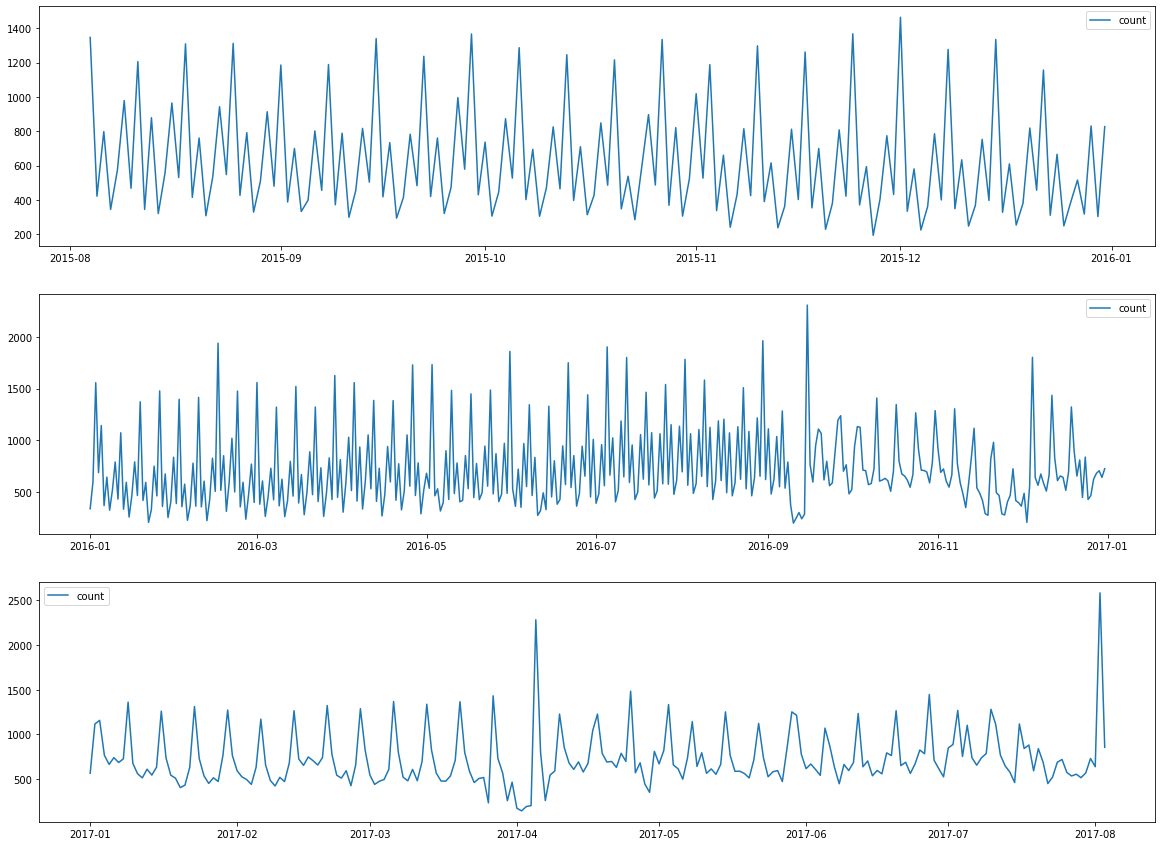

In [27]:
# plot the checkout trend separately in 2015, 2016 and 2017
label1 = checkout_2015['Review_Date_YMD']
count1 = checkout_2015['count']
label2 = checkout_2016['Review_Date_YMD']
count2 = checkout_2016['count']
label3 = checkout_2017['Review_Date_YMD']
count3 = checkout_2017['count']

fig, ax = plt.subplots(3, 1, figsize = (20,15))
ax[0].plot(label1, count1, label="count")
ax[0].legend()
ax[1].plot(label2, count2, label="count")
ax[1].legend()
ax[2].plot(label3, count3, label="count")
ax[2].legend()
plt.show()

Based on these three line charts, we can see each month has several checkout peaks, the period between the bottom and peak should nearly equal to travelers' length of stay.

## Reviewer's Country

In [32]:
# count reviewr's country
country = frequency('Reviewer_Nationality')
country.to_csv('data/country.csv', index = False)
country.head()

Reviewer_Nationality   count
214             United Kingdom   245246
216   United States of America    35437
14                   Australia    21686
98                     Ireland    14827
213       United Arab Emirates    10235

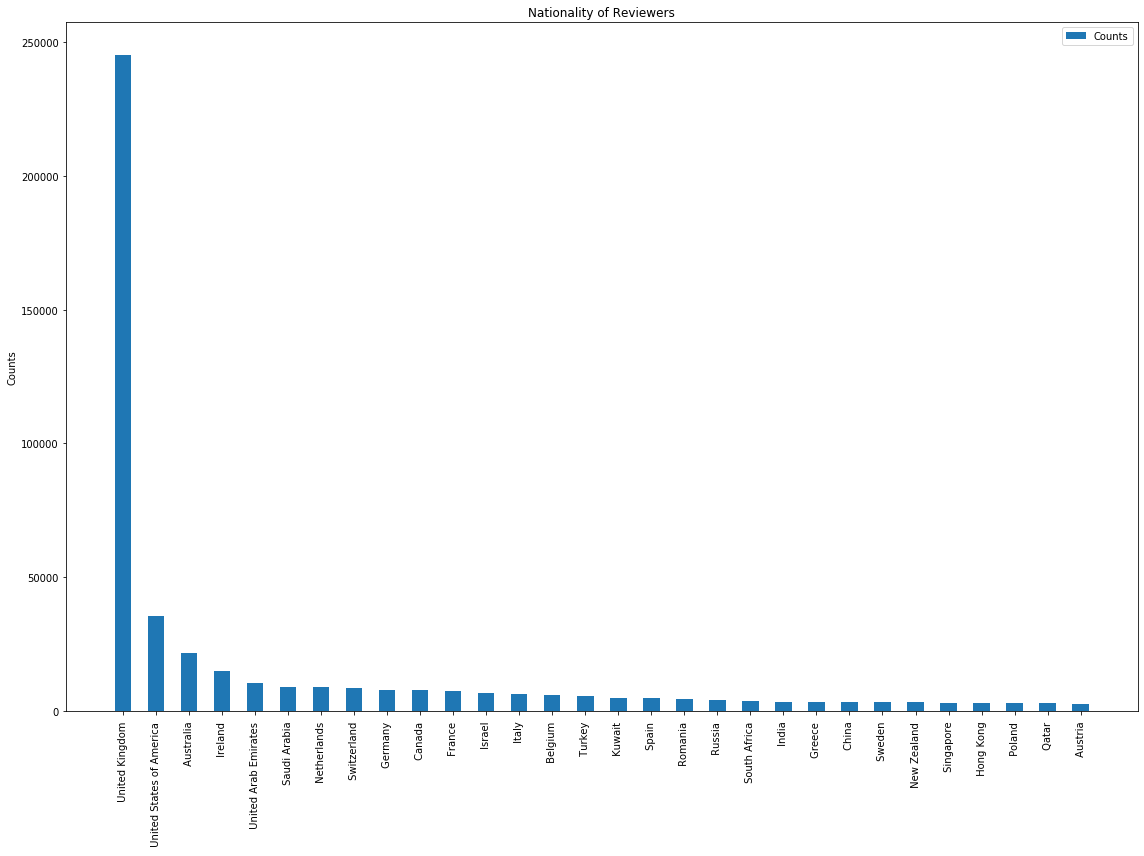

In [77]:
country = country[:30]
bar_chart(country['Reviewer_Nationality'], country['count'], (16, 12), 'Nationality of Reviewers', 'Counts', 90)

The United Kindom has the highest traveler numbers, the counts are several times as other countries.

## Average Rating of Hotel 

In [34]:
avg_score = df.groupby('Hotel_Name').agg({'Average_Score': np.average}).reset_index().sort_values(by = 'Average_Score', ascending = False)
avg_score.to_csv('data/avg_score.csv', index = False)
print("The hotel with the highest average score is: " + avg_score[:1]['Hotel_Name'].values.tolist()[0] + ", " + str(avg_score[:1]['Average_Score'].values.tolist()[0]) + '.')
print("The hotel with the lowest average score is: " + avg_score[-1:]['Hotel_Name'].values.tolist()[0] + ", " + str(avg_score[-1:]['Average_Score'].values.tolist()[0]) + '.')

The hotel with the highest average score is: Ritz Paris, 9.8.
The hotel with the lowest average score is: Hotel Liberty, 5.2.


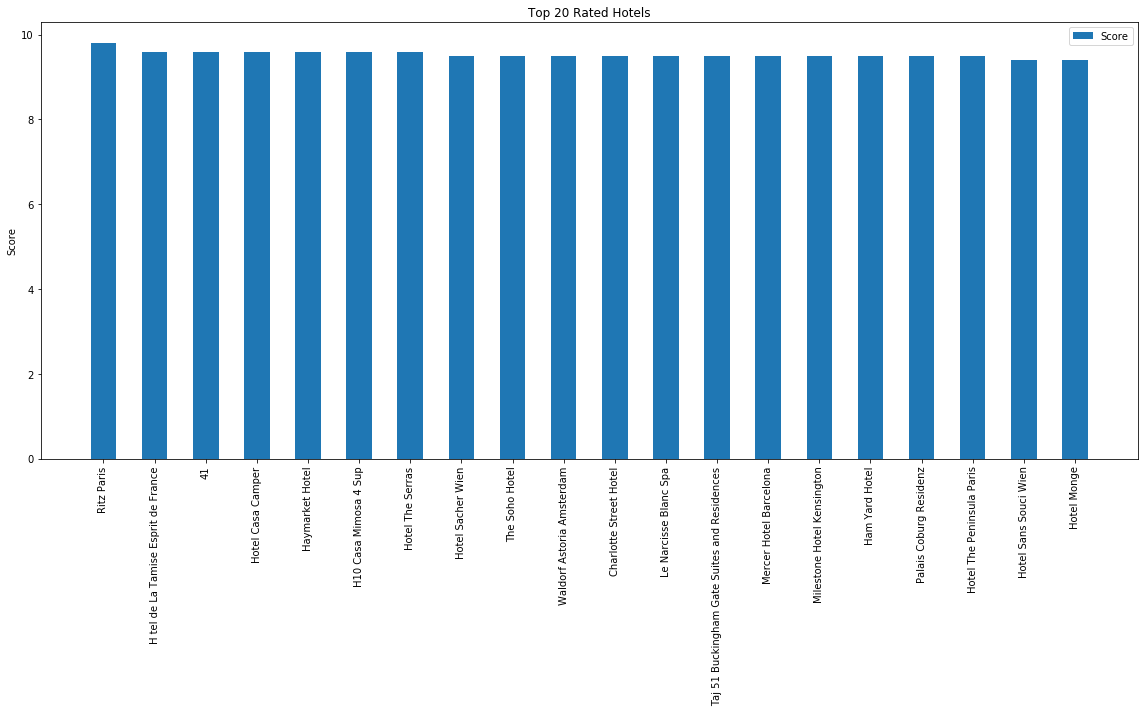

In [36]:
bar_chart(avg_score['Hotel_Name'][:20], avg_score['Average_Score'][:20], (16,10), 'Top 20 Rated Hotels', 'Score', 90)

## Hotel Levels

In [37]:
def hotel_level(score):
    """Divide hotel level function.
    Arguments
        score: hotel average score.
    Returns
        'Bad, normal, good', three levels of the hotel.
    """
    if score < 7:
        return 'bad'
    elif score < 8:
        return 'normal'
    else:
        return 'good'

In [38]:
avg_score = df.groupby('Hotel_Name').agg({'Average_Score': np.average}).reset_index()
avg_score['attitude'] = avg_score['Average_Score'].apply(lambda x: hotel_level(x))
level = avg_score.groupby('attitude')['attitude'].agg({'count'}).reset_index()
level.sort_values(by = 'count', inplace = True)
level.to_csv('data/level.csv', index = False)
level

attitude  count
0      bad     12
2   normal    226
1     good   1254

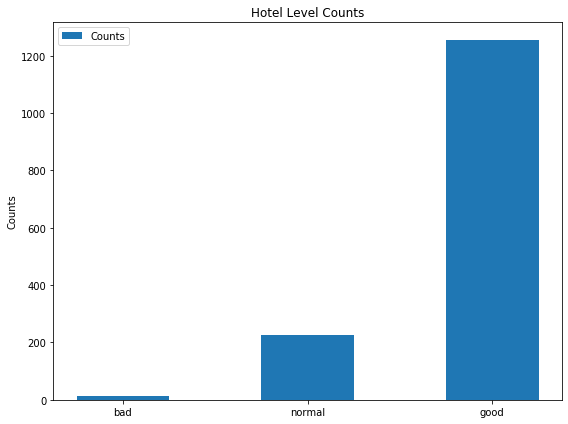

In [39]:
bar_chart(level['attitude'], level['count'], (8,6), 'Hotel Level Counts', 'Counts', 0)

# WordCloud

In [61]:
from wordcloud import WordCloud

def show_wordcloud(data):
    """Wordcloud function.
    Arguments
        data: input text
    Returns
        wordcloud image
    """
    wordcloud = WordCloud(
    background_color = 'white',
    max_words = 200,
    max_font_size = 40,
    scale = 3,
    random_state = 42).generate(str(data))
    
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
        
    plt.imshow(wordcloud)
    plt.show()

# Data Preprocessing - Word Tokenize

In [41]:
# replace all 'no negative' and 'no positive' to '', and merge the negative and positive review
review = df[['Hotel_Name', 'Reviewer_Score', 'Negative_Review', 'Positive_Review']]
review['Negative_Review'].replace('No Negative', '', inplace = True)
review['Positive_Review'].replace('No Positive', '', inplace = True)
review['Review'] = review['Negative_Review'] + review['Positive_Review']

# classify the negative review based on reviewer score, 1 is negative, 0 is positive
review['is_neg'] = review['Reviewer_Score'].apply(lambda x: 1 if x < 5 else 0)
review.head()

/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

Hotel_Name  Reviewer_Score  \
0  Hotel Arena             2.9   
1  Hotel Arena             7.5   
2  Hotel Arena             7.1   
3  Hotel Arena             3.8   
4  Hotel Arena             6.7   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                                      
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

                                              Review  is_neg  
0   I am so angry that i made this post available...       1  
1   No real complaints the hotel was great great ...       0  
2   Rooms are nice but for elderly a bit difficul...       0  
3   My room was dirty and I was afraid to walk ba...       1  
4   You When I booked with your company on line y...       0

In [42]:
def get_wordnet_pos(pos_tag):
    """Pos tag word function
    Arguments
        pos_tag: the abbr of part of speech
    Returns
        wordnet type
    """
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    """Clean text function
    Arguments
        text: the text gonna be cleaned
    Returns
        text after cleaned
    """
    # lower
    text = text.lower()
    # tokenize and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contains numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stopwords
    stop = stopwords.words('english')
    text = [w for w in text if w not in stop]
    # remove empty tokens
    text = [w for w in text if len(w) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [w for w in text if len(w) > 1]
    # join all by space
    text = " ".join(text)
    return (text)

In [43]:
review['clean'] = review['Review'].apply(lambda x: clean_text(x))
review.head()

/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Hotel_Name  Reviewer_Score  \
0  Hotel Arena             2.9   
1  Hotel Arena             7.5   
2  Hotel Arena             7.1   
3  Hotel Arena             3.8   
4  Hotel Arena             6.7   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                                      
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

                                              Review  is_neg  \
0   I am so angry that i made this post available...       1   
1   No real complaints the hotel was great great ...       0   
2   Rooms are nice but for elderly a bit difficul...       0   
3   My room was dirty and I was afraid to walk ba...       1   
4   You When I booked with your company on line y...       0   

                                               clean  
0  angry make post available via possible site us...  
1  real complaint hotel great great location surr...  
2  room nice elderly bit difficult room two story...  
3  room dirty afraid walk barefoot floor look cle...  
4  book company line show picture room think get ...

In [44]:
# sentiment classifier, classify the sentiment to four types: neg, neu, pos and compound.
sid = SentimentIntensityAnalyzer()
review['sentiments'] = review['Review'].apply(lambda x: sid.polarity_scores(x))
review = pd.concat([review.drop(['sentiments'], axis=1), review['sentiments'].apply(pd.Series)], axis=1)
review.head()

/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Hotel_Name  Reviewer_Score  \
0  Hotel Arena             2.9   
1  Hotel Arena             7.5   
2  Hotel Arena             7.1   
3  Hotel Arena             3.8   
4  Hotel Arena             6.7   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                                      
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

                                              Review  is_neg  \
0   I am so angry that i made this post available...       1   
1   No real complaints the hotel was great great ...       0   
2   Rooms are nice but for elderly a bit difficul...       0   
3   My room was dirty and I was afraid to walk ba...       1   
4   You When I booked with your company on line y...       0   

                                               clean    neg    neu    pos  \
0  angry make post available via possible site us...  0.083  0.859  0.058   
1  real complaint hotel great great location surr...  0.058  0.757  0.186   
2  room nice elderly bit difficult room two story...  0.111  0.671  0.218   
3  room dirty afraid walk barefoot floor look cle...  0.099  0.754  0.147   
4  book company line show picture room think get ...  0.058  0.861  0.081   

   compound  
0   -0.8589  
1    0.9494  
2    0.8402  
3    0.9355  
4    0.5263

In [45]:
# add number of characters column
review['word_counts'] = review['Review'].apply(lambda x: len(x.split(" ")))

In [64]:
review.to_csv('data/sid_review.csv', index = False)

## WordCloud Display

#### Positive review

In [46]:
# highest positive sentiment reviews (with more than 5 words)
review[review['word_counts'] >= 5].sort_values('pos', ascending = False)[['Review', 'pos']].head(20)

Review    pos
340703                               Great great great o   1.000
335492                            Nice clean comfortable   1.000
80396                       Lovely clean comfortable warm  1.000
297016                       Clean comfortable efficient   1.000
317800                                       Great  Nice   1.000
180510                          A super friendly welcome   1.000
176633                           Clean helpful efficient   1.000
49544                                  Great great great   1.000
173978                      clean comfortable attractive   1.000
50106     Friendly helpful staff Clean super comfortable   0.941
390405   Comfortable clean great location Definitely r...  0.939
449874                                LOVE LOVE and Love   0.934
404683           Great clean comfortable Great concierge   0.934
43101          A perfect location comfortable great value  0.931
387389             Great location Safe Comfortable Clean   0.929
288980              Great location good value comfortable  0.927
394048                              Noting Best best best  0.926
192385          Clean comfortable friendly helpful staff   0.923
263366          Friendly Smiling Efficient Helpful staff   0.922
118774               Friendly pleasant staff warm welcome  0.919

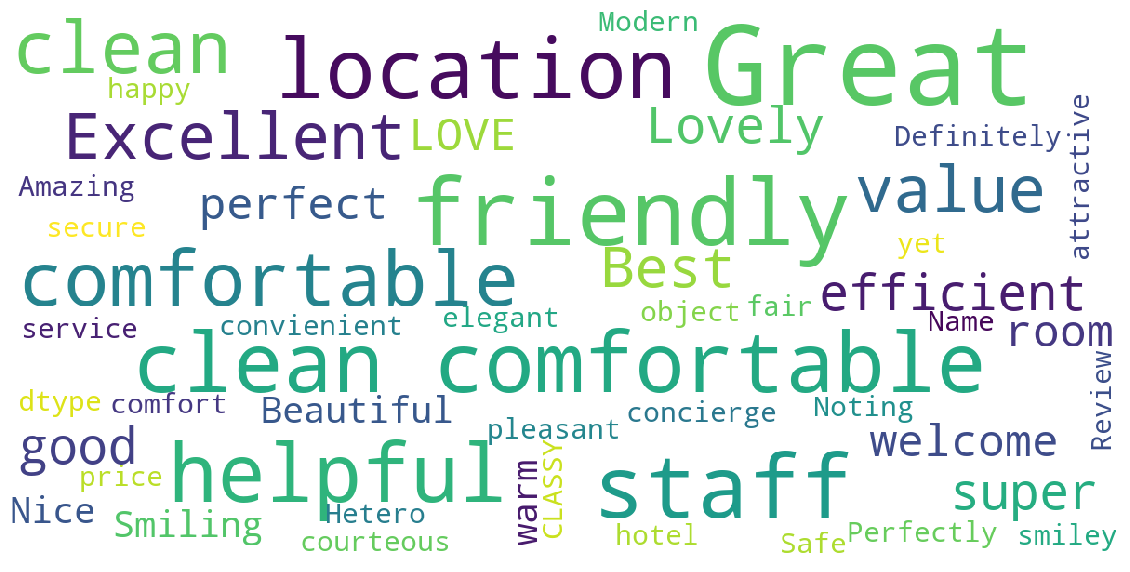

In [47]:
show_wordcloud(review[review['word_counts'] >= 5].sort_values('pos', ascending = False)['Review'].head(50))

#### Negative Review

In [49]:
# lowest negative sentiment reviews (with more than 5 words)
review[review['word_counts'] >= 5].sort_values('neg', ascending = False)[['Review', 'neg']].head(20)

Review    neg
511896                             No a c   1.000
50365          no complaints no complaints  1.000
46239                    n a No complaints  1.000
166515         No complaints No complaints  1.000
177895                             No A C   1.000
225249   Nothing perfect Great great great  0.928
324777    Nothing  Clean Gorgeous Perfect   0.894
319196         Nothing Classy calm perfect  0.880
47865               Nothing Good good good  0.878
442882    Nothing Clean friendly efficient  0.878
476092                        All No no no  0.868
453513                Dirty bad condition   0.865
67391            Abusive sarcastic m staff  0.861
102885                   Dirty very dirty   0.859
18894                   No bad experience   0.851
378117            Nothing Thanks I m happy  0.844
243770               Nothing  Great value   0.842
120335       No real faults No real faults  0.841
402358          Nothing Clean Comfortable   0.832
193086               No dislikes LOCATION   0.831

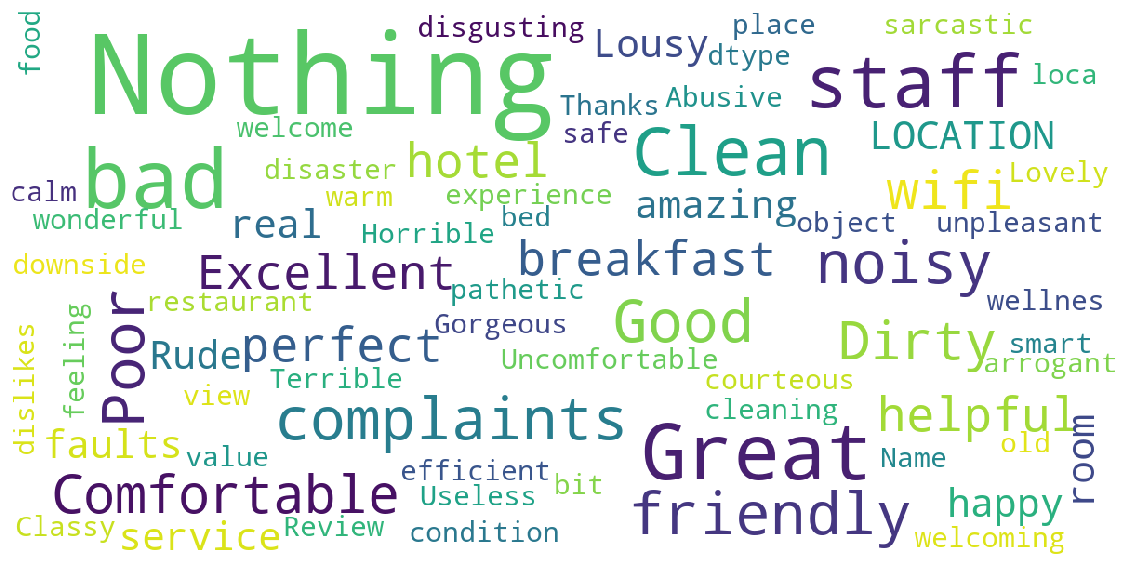

In [50]:
show_wordcloud(review[review['word_counts'] >= 5].sort_values('neg', ascending = False)['Review'].head(50))

# Modelling: Sentiment Analysis

In [51]:
# convert the sentiment, 0 means negative, 1 means positive 
sentiment = review[['clean', 'is_neg']]
sentiment.rename(columns = {'clean': 'review', 'is_neg': 'sentiment'}, inplace = True)
sentiment['sentiment'] = sentiment['sentiment'].apply(lambda x: 0 if x > 0 else 1)
sentiment.to_csv('data/sentiment.csv', index = False)
sentiment.head()

/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


review  sentiment
0  angry make post available via possible site us...          0
1  real complaint hotel great great location surr...          1
2  room nice elderly bit difficult room two story...          1
3  room dirty afraid walk barefoot floor look cle...          0
4  book company line show picture room think get ...          1

In [52]:
# import corresponding packages and create the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
lr_model = Pipeline(steps = ([('lr', LogisticRegression(penalty = 'l2', max_iter = 500, C = 1, random_state = 42))]))

In [53]:
# split the dataset, 0.8 training and 0.2 testing
X_train, X_test, y_train, y_test = train_test_split(sentiment['review'], sentiment['sentiment'], test_size = 0.2, random_state = 42)

## Bag of Words Model

In [54]:
# convert the text documents to bag of words features
cv = CountVectorizer(min_df = 0, max_df = 1, binary = False, ngram_range = (1, 3))
cv_train_reviews = cv.fit_transform(X_train)
cv_test_reviews = cv.transform(X_test)
print('Bag of Words cv train:', cv_train_reviews.shape)
print('Bag of Words cv test:', cv_test_reviews.shape)

Bag of Words cv train: (412590, 4678328)
Bag of Words cv test: (103148, 4678328)


## TFIDF

In [55]:
# convert the text documents to tfidf features
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews=tv.fit_transform(X_train)
tv_test_reviews=tv.transform(X_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (412590, 4678328)
Tfidf_test: (103148, 4678328)


## Logistic Regression Model

In [56]:
# training the logistic regression model
# fitting for bag of words
lr_bow = lr_model.fit(cv_train_reviews, y_train)
print(lr_bow)

# fitting for tfidf
lr_tfidf = lr_model.fit(tv_train_reviews, y_train)
print(lr_tfidf)

Pipeline(memory=None,
         steps=[('lr',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('lr',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', to

In [57]:
# predict the model for bag of words
lr_bow_pred = lr_model.predict(cv_test_reviews)
print(lr_bow_pred)

# predict the model for tfidf
lr_tfidf_pred = lr_model.predict(tv_test_reviews)
print(lr_tfidf_pred)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


# Model Evaluation

In [58]:
# calculate the accuracy of the model in two types
from sklearn import metrics
lr_bow_score = metrics.accuracy_score(y_test, lr_bow_pred)
print("lr_bow_score:", lr_bow_score)
lr_tfidf_score = metrics.accuracy_score(y_test, lr_tfidf_pred)
print("lr_tfidf_score:", lr_tfidf_score)

lr_bow_score: 0.9564412300771706
lr_tfidf_score: 0.9563927560398651


### Classification Report

In [59]:
lr_bow_report=classification_report(y_test,lr_bow_pred,target_names=['Positive','Negative'])
print(lr_bow_report)

lr_tfidf_report=classification_report(y_test,lr_tfidf_pred,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.00      0.00      4498
    Negative       0.96      1.00      0.98     98650

    accuracy                           0.96    103148
   macro avg       0.98      0.50      0.49    103148
weighted avg       0.96      0.96      0.94    103148

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      4498
    Negative       0.96      1.00      0.98     98650

    accuracy                           0.96    103148
   macro avg       0.48      0.50      0.49    103148
weighted avg       0.91      0.96      0.94    103148



/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [60]:
cm_bow=confusion_matrix(y_test,lr_bow_pred,labels=[1,0])
print(cm_bow)

cm_tfidf=confusion_matrix(y_test,lr_tfidf_pred,labels=[1,0])
print(cm_tfidf)

[[98650     0]
 [ 4493     5]]
[[98650     0]
 [ 4498     0]]


Based on the model evaluation, the logistic regression model performs well. And the difference of using bag of words and tfidf is not obvious. 